In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
from mpl_toolkits.mplot3d import Axes3D

## Part 2: Plotting

ValueError: Masked arrays must be 1-D

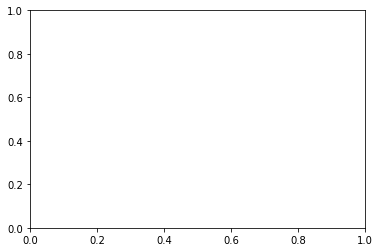

In [4]:
# Part 2: Plotting
data = np.genfromtxt ('ex1data1.txt', delimiter=",")
X = np.matrix(data[:, 0]).T
y = np.matrix(data[:, 1]).T
m = len(y)
plt.scatter(X, y, alpha=0.7)
ones = np.ones((m, 1))
X = np.hstack((ones, X)) # Add a column of ones to x

## Part 3: Cost and Gradient descent

In [7]:
def computeCost(X, y, theta):
    m = len(y)
    costs = np.power((X*theta - y), 2)
    return (sum(costs)) / (2*m)
    
def computeCostDerivative(X, y, theta, j):
    m = len(y)
    dcosts = np.multiply((X*theta - y), X[:, j])
    return sum(dcosts) / m
    
def gradientDescent(X, y, theta = np.zeros((2, 1)), alpha = 0.01, num_iters = 1000, verbose = False):
    """
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    T_history = np.zeros((num_iters, 2))
    theta_temp = np.matrix(theta, dtype='float64')
    
    for i in range(num_iters):
        if verbose:
            J_history[i] = computeCost(X, y, theta)
            T_history[i] = theta.T
        for j in range(len(theta)):
            theta_temp[j] = theta[j] - alpha * computeCostDerivative(X, y, theta, j)
        theta = theta_temp
    return theta, J_history, T_history.T


Testing the cost function ...

With theta = [0 ; 0]
Cost computed =  [[ 32.07273388]]
Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed =  [[ 54.24245508]]
Expected cost value (approx) 54.24


Running Gradient Descent ...

Theta found by gradient descent:
 [[-3.71377262]
 [ 1.17478184]]
Expected theta values (approx):
 -3.6303
  1.1664


For population = 35,000, we predict a profit of  [[ 3979.63814181]]
For population = 70,000, we predict a profit of  [[ 45097.00249877]]


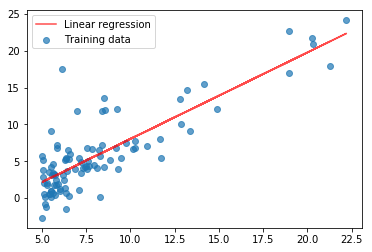

In [14]:
iterations, alpha = 1500, 0.01 # Some gradient descent settings

print('\nTesting the cost function ...\n')

# compute and display initial cost
theta = np.zeros((2, 1))
J = computeCost(X, y, theta);
print('With theta = [0 ; 0]\nCost computed = ', J);
print('Expected cost value (approx) 32.07\n');

# further testing of the cost function
theta = np.matrix('-1 ; 2')
J = computeCost(X, y, theta);
print('\nWith theta = [-1 ; 2]\nCost computed = ', J);
print('Expected cost value (approx) 54.24\n');

print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta, _, _ = gradientDescent(X, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:\n', theta);

print('Expected theta values (approx):');
print(' -3.6303\n  1.1664\n\n');

# Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
print('For population = 35,000, we predict a profit of ', predict1*10000);
predict2 = [1, 7] * theta;
print('For population = 70,000, we predict a profit of ', predict2*10000);

# Plot the linear fit
plt.scatter(X[:,1], y, alpha=0.7, label= 'Training data')
plt.plot(X[:,1], X*theta, 'r-', alpha=0.7, label= 'Linear regression')
plt.legend()

## Part 4: Visualizing J(theta_0, theta_1) 

In [56]:
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.matrix([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, t)

Visualizing J(theta_0, theta_1) ...



[[-3.71377262]
 [ 1.17478184]]


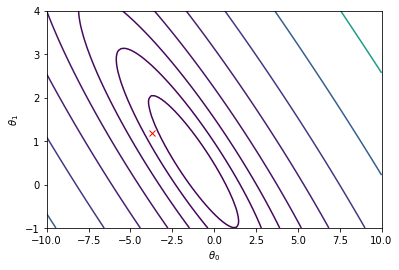

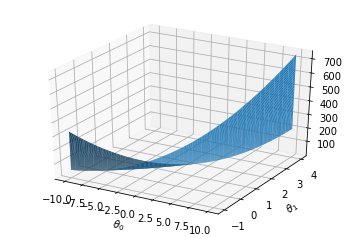

In [55]:
plt.plot(theta[0], theta[1], 'rx')
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_0$'); plt.ylabel(r'$\theta_1$');

#%%
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlabel(r'$\theta_0$'); plt.ylabel(r'$\theta_1$');
ax.plot_surface(theta0_vals, theta1_vals, J_vals)

print(theta)

## Analytical solution

In [1]:
def get_thetas(X, y):
    return (X.T*X).I * (X.T*y)

In [9]:
print(get_thetas(X, y))
print(gradientDescent(X, y)[0])


[[-3.89578088]
 [ 1.19303364]]
[[-3.25095985]
 [ 1.12837093]]
